<a href="https://colab.research.google.com/github/Ibrahim-Abido/MachineLearningColabProjects/blob/Mnist/Assignment2_MNIST_IbrahimGomaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


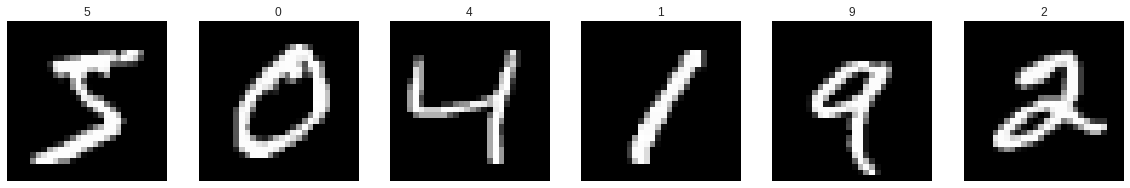

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))


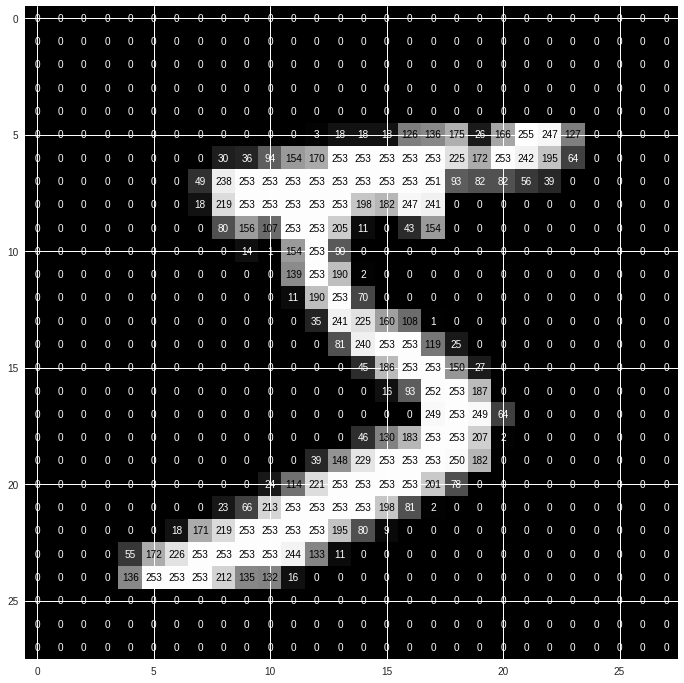

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [ ]:
from collections import Counter
counted = Counter(y_train)
counted

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

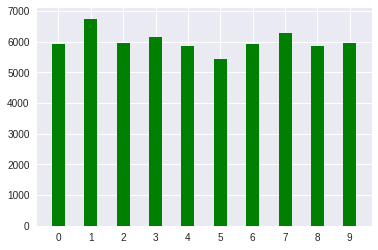

In [ ]:
plt.bar(counted.keys(), counted.values(), 0.4, color='g')
plt.xticks(np.arange(0, 10, 1)) 
plt.show()

In [ ]:
x_train_zero = X_train[y_train == 0]
x_train_one = X_train[y_train == 1]
x_train_two = X_train[y_train == 2]
x_train_three = X_train[y_train == 3]
x_train_four = X_train[y_train == 4]
x_train_five = X_train[y_train == 5]
x_train_six = X_train[y_train == 6]
x_train_seven = X_train[y_train == 7]
x_train_eight = X_train[y_train == 8]
x_train_nine = X_train[y_train == 9]
X_train_sorted={0:x_train_zero,1:x_train_one,2:x_train_two,3:x_train_three,4:x_train_four,5:x_train_five,6:x_train_six,7:x_train_seven,8:x_train_eight,9:x_train_nine}




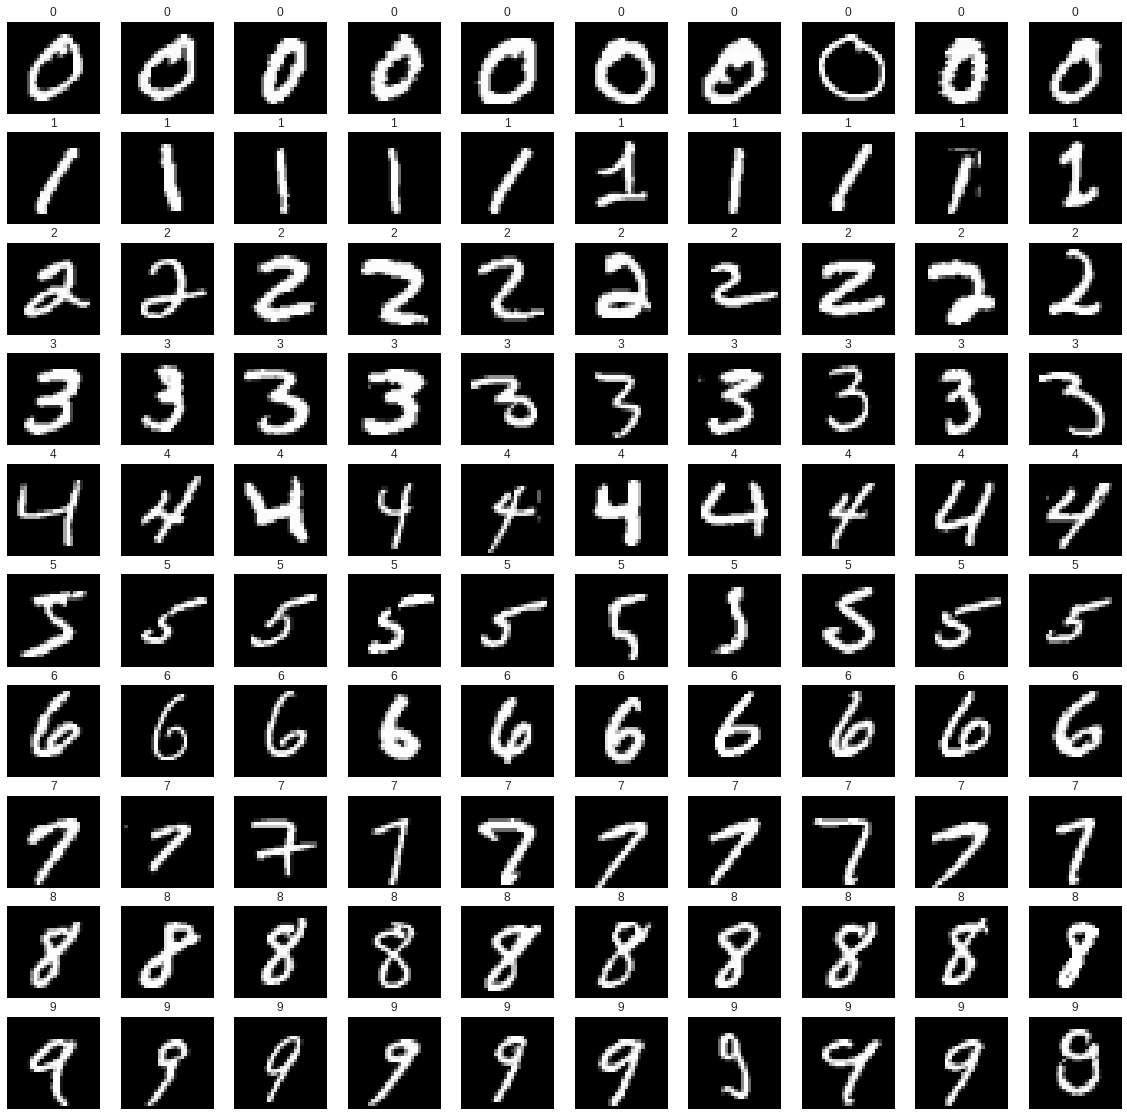

In [ ]:
fig = plt.figure(figsize=(20,20))
for j in range(10):
  for i in range(10):
    ax = fig.add_subplot(10, 10, i+j*10+1, xticks=[], yticks=[])
    #samples=X_train_sorted[0]
    ax.imshow(X_train_sorted[j][i], cmap='gray')
    ax.set_title(str(j))


In [ ]:
# rescale [0,255] --> [0,1]
X_train=X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32')/255
X_test=X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32')/255

In [ ]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
opt=Adam(lr=10e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.2708 - acc: 0.9198
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1308 - acc: 0.9613
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1167 - acc: 0.9678
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.1019 - acc: 0.9719
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0922 - acc: 0.9750


In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 53us/step
Test accuracy: 96.9600%
